In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# 取第一筆
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


這個是: 5


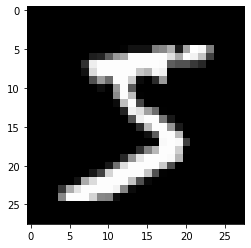

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("這個是:", y_train[0])
plt.imshow(x_train[0], cmap="gray")

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 64 * 784 + 64 = 50240
model.add(Dense(256, activation="relu", input_dim=784))
# 64 * 10 + 10(bias)
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [8]:
# 預處理
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[2])
print("處理過:", y_train_cat[2])

原本: 4
處理過: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
# -1: 自動計算(一個位置)
# 圖片: 1D -> /255(normalize)
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [10]:
# batch_size: 看多少筆資料做一次梯度下降(圖片不大:100-200, 圖片大: 10-20)
# validation_split: 切出一部分作為驗證資料
# epochs: 整份資料集看多少遍
# 一個epoch做了 54000 / 200 = 270 次梯度下降
# verbose(選用): 0(Quiet), 1(Noisy), 2(Normal)
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          validation_split=0.1, 
          epochs=12,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 - 2s - loss: 0.3743 - accuracy: 0.8954 - val_loss: 0.1634 - val_accuracy: 0.9590
Epoch 2/12
54000/54000 - 1s - loss: 0.1654 - accuracy: 0.9525 - val_loss: 0.1146 - val_accuracy: 0.9668
Epoch 3/12
54000/54000 - 1s - loss: 0.1139 - accuracy: 0.9674 - val_loss: 0.0956 - val_accuracy: 0.9745
Epoch 4/12
54000/54000 - 1s - loss: 0.0866 - accuracy: 0.9756 - val_loss: 0.0829 - val_accuracy: 0.9762
Epoch 5/12
54000/54000 - 1s - loss: 0.0679 - accuracy: 0.9808 - val_loss: 0.0770 - val_accuracy: 0.9762
Epoch 6/12
54000/54000 - 1s - loss: 0.0556 - accuracy: 0.9846 - val_loss: 0.0733 - val_accuracy: 0.9795
Epoch 7/12
54000/54000 - 1s - loss: 0.0453 - accuracy: 0.9878 - val_loss: 0.0709 - val_accuracy: 0.9783
Epoch 8/12
54000/54000 - 1s - loss: 0.0377 - accuracy: 0.9904 - val_loss: 0.0697 - val_accuracy: 0.9780
Epoch 9/12
54000/54000 - 1s - loss: 0.0298 - accuracy: 0.9930 - val_loss: 0.0697 - val_accuracy: 0.9803
Epoch 10/12
540

In [11]:
# 只要還在tf裡, 請帶入one-hot encoding
model.evaluate(x_test_norm, y_test_cat, verbose=2)

10000/1 - 0s - loss: 0.0325 - accuracy: 0.9802


[0.06452813334367238, 0.9802]

In [17]:
# predict: 給機率 predict_classes: 給類別
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
# 不是在tf裡, 帶入原本的y
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(真實)".format(i) for i in range(10)]
pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),969,0,2,1,1,2,3,1,1,0
1(真實),0,1125,3,1,0,1,2,0,3,0
2(真實),3,1,1014,0,2,0,2,4,5,1
3(真實),0,0,7,984,0,5,3,2,7,2
4(真實),0,0,3,0,961,0,5,1,1,11
5(真實),2,0,0,8,2,869,4,1,5,1
6(真實),4,2,1,1,2,4,943,0,1,0
7(真實),0,4,10,4,0,0,0,1005,1,4
8(真實),2,0,3,2,3,5,2,2,952,3
9(真實),3,3,0,3,9,5,0,4,2,980


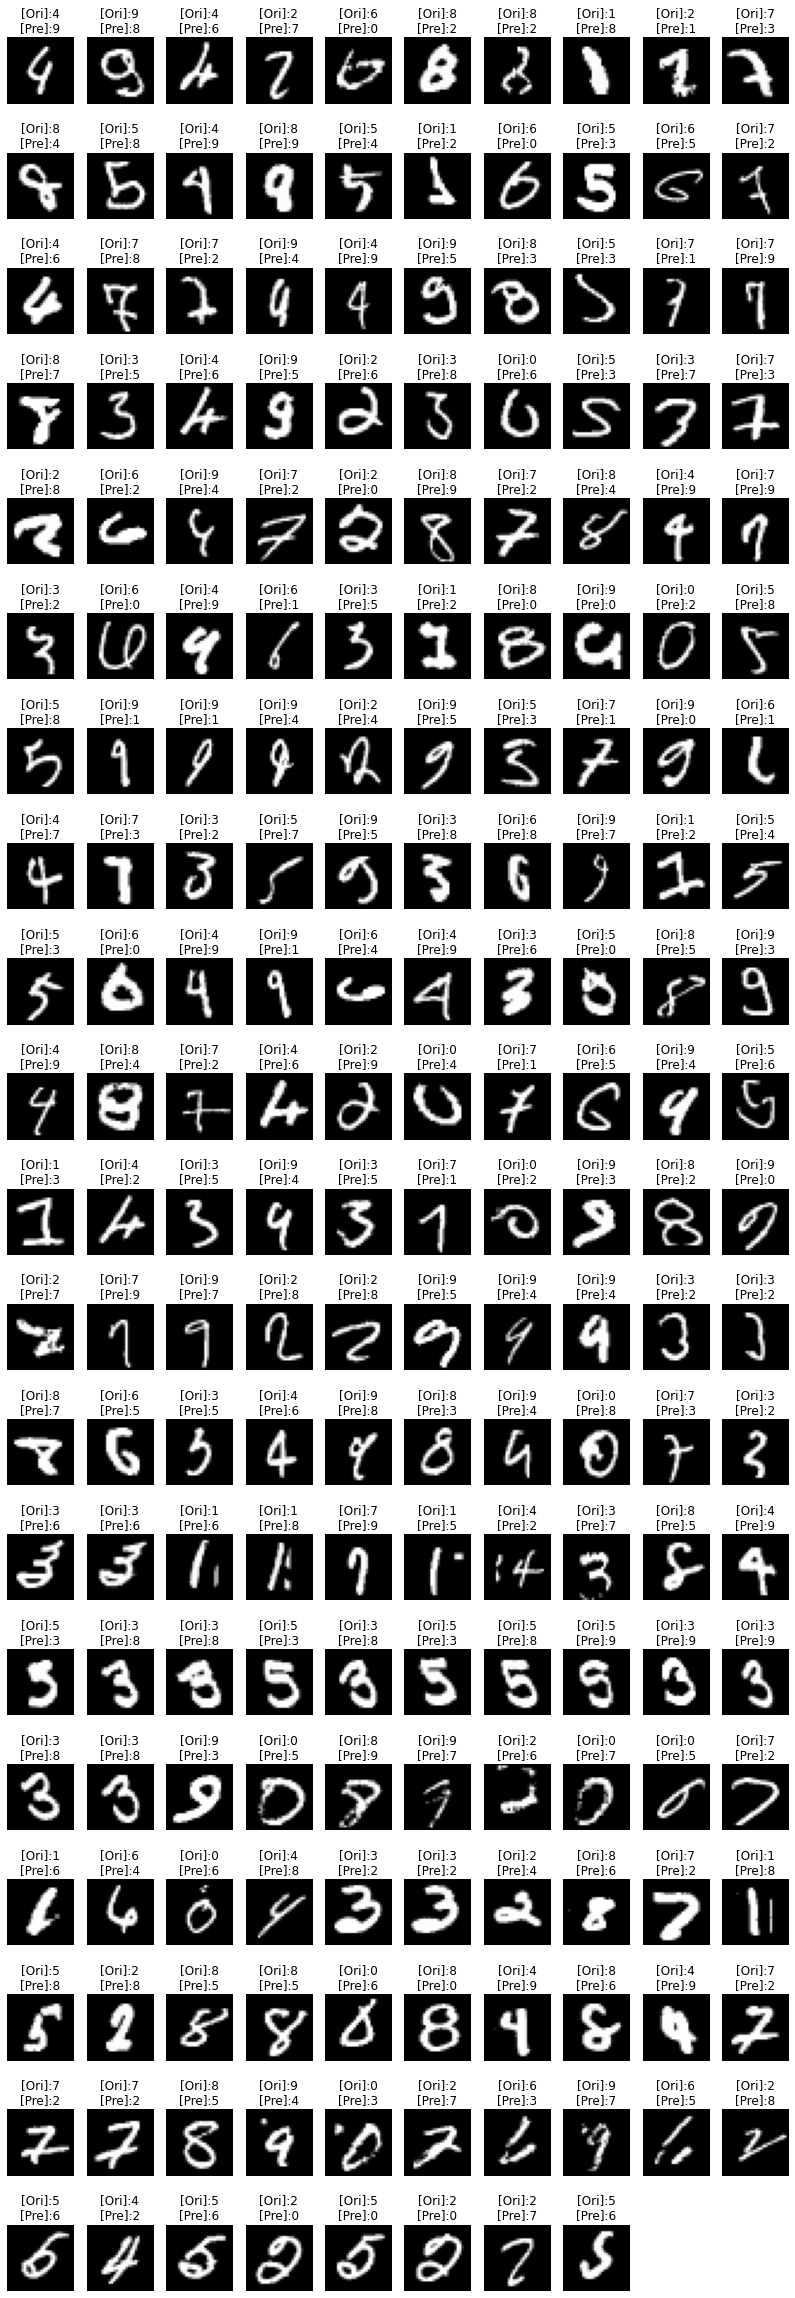

In [26]:
import numpy as np
# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(false_answer[i],
                                    false_predict[i])
    plt.title(t)
    plt.imshow(img, cmap="gray")

輸入檔名:test4.png
應該是: 4


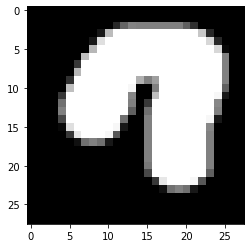

In [39]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", ans)
plt.imshow(img, cmap="gray")